In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("CW2_Telco_Churn_Data.csv")

In [3]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes


In [4]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(7043, 21)
CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [5]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
CustomerID
Gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn

Numeric columns:
SeniorCitizen
Tenure
MonthlyCharges
TotalCharges


In [6]:
df.skew(axis = 0, skipna = True)

SeniorCitizen      1.833633
Tenure             0.304980
MonthlyCharges    -0.221487
TotalCharges      71.541249
dtype: float64

In [7]:
df.kurt(axis = 0, skipna = True)

SeniorCitizen        1.362596
Tenure              -0.998002
MonthlyCharges      -1.256983
TotalCharges      5689.347647
dtype: float64

In [8]:
sc = df.SeniorCitizen.unique()
sc.sort()
sc

array([0, 1], dtype=int64)

In [9]:
df = df.replace({'SeniorCitizen': {1: "Yes", 0: "No"}})

In [10]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0390-DCFDQ,Female,Yes,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes


In [11]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
CustomerID
Gender
SeniorCitizen
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn

Numeric columns:
Tenure
MonthlyCharges
TotalCharges


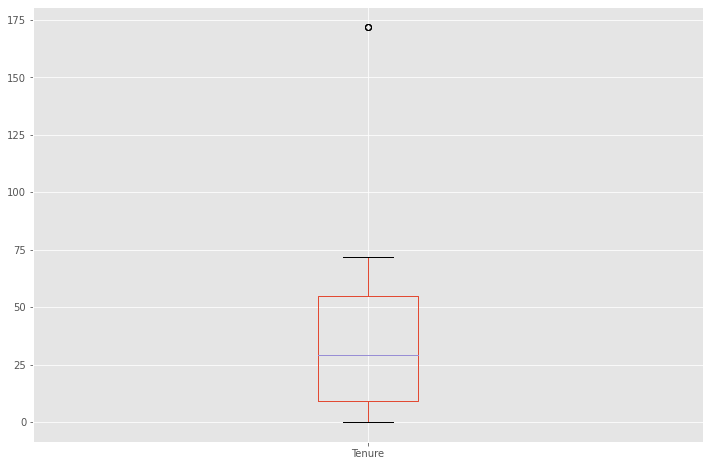

In [12]:
df.Tenure.plot(kind='box', figsize=(12,8))
plt.show()

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
Upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(Upper)

Tenure             124.0000
MonthlyCharges     171.3750
TotalCharges      8863.1625
dtype: float64


In [14]:
Tn = df.Tenure.unique()
Tn.sort()
Tn

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72, 172], dtype=int64)

In [15]:
df[df["Tenure"]==172]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3295,4900-MSOMT,Female,No,Yes,Yes,172,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),80.20,5714.20,No
4885,5304-EFJLP,Male,Yes,Yes,No,172,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.65,8022.85,No
6071,0401-WDBXM,Male,No,Yes,Yes,172,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.55,7542.25,No


In [16]:
df["Tenure"] = np.where(df["Tenure"] ==172, df.Tenure.median(),
                        df['Tenure'])

In [17]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0390-DCFDQ,Female,Yes,Yes,No,1.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes


In [18]:
df[df["Tenure"]==172]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [19]:
df.iloc[3295]

CustomerID                         4900-MSOMT
Gender                                 Female
SeniorCitizen                              No
Partner                                   Yes
Dependents                                Yes
Tenure                                   29.0
PhoneService                              Yes
MultipleLines                             Yes
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                           No
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                           80.2
TotalCharges                           5714.2
Churn                                      No
Name: 3295, dtype: object

In [20]:
Tn = df.Tenure.unique()
Tn.sort()
Tn

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72.])

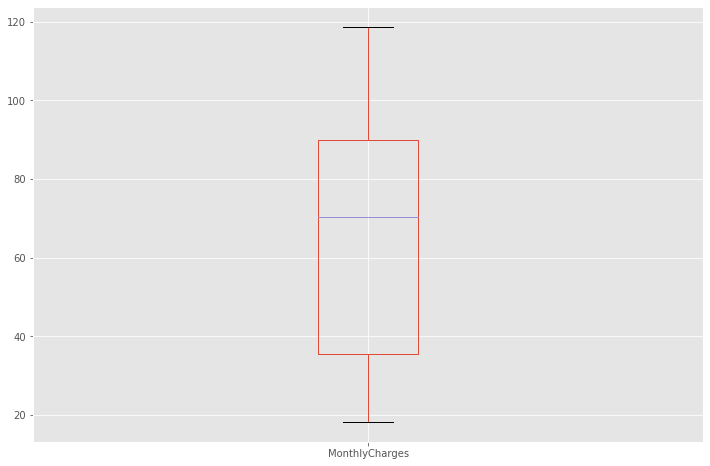

In [21]:
df.MonthlyCharges.plot(kind='box', figsize=(12,8))
plt.show()

In [22]:
mc = df.MonthlyCharges.unique()
mc.sort()
mc

array([ 18.25,  18.4 ,  18.55, ..., 118.65, 118.75,    nan])

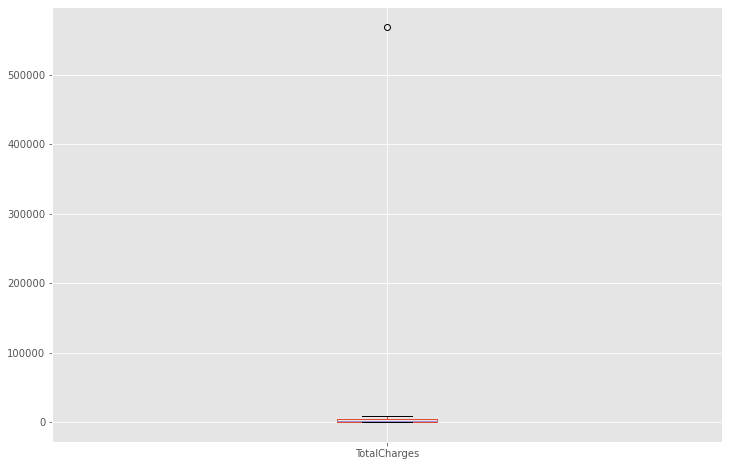

In [23]:
df.TotalCharges.plot(kind='box', figsize=(12,8))
plt.show()

In [24]:
Tc = df.TotalCharges.unique()
Tc.sort()
Tc

array([5.14000e-01, 1.88000e+01, 1.88500e+01, ..., 8.67245e+03,
       8.68480e+03, 5.68805e+05])

In [25]:
df[df["TotalCharges"]==568805]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5563,3791-LGQCY,Female,Yes,Yes,No,56.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.65,568805.0,Yes


In [26]:
df["TotalCharges"] = np.where(df["TotalCharges"] ==568805, 
                              df.TotalCharges.median(),
                        df["TotalCharges"])

In [27]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0390-DCFDQ,Female,Yes,Yes,No,1.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes


In [28]:
Tc = df.TotalCharges.unique()
Tc.sort()
Tc

array([5.14000e-01, 1.88000e+01, 1.88500e+01, ..., 8.67010e+03,
       8.67245e+03, 8.68480e+03])

In [29]:
df[df["TotalCharges"]==568805]

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


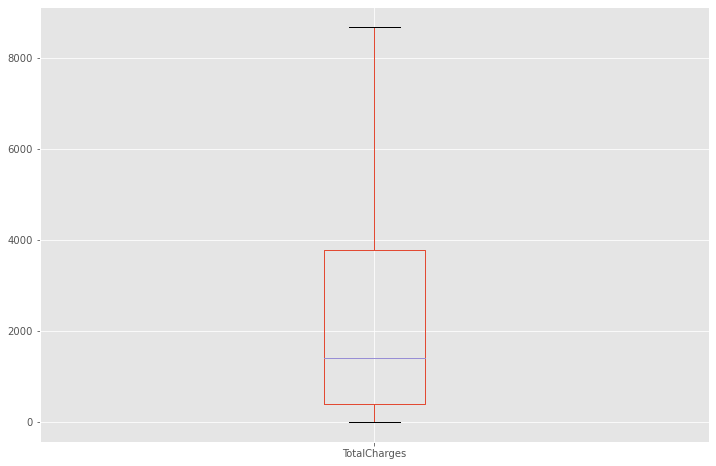

In [30]:
df.TotalCharges.plot(kind='box', figsize=(12,8))
plt.show()

In [31]:
df.skew(axis = 0, skipna = True)

Tenure            0.240381
MonthlyCharges   -0.221487
TotalCharges      0.964535
dtype: float64

In [32]:
df.kurt(axis = 0, skipna = True)

Tenure           -1.385992
MonthlyCharges   -1.256983
TotalCharges     -0.224393
dtype: float64

In [33]:
Upper

Tenure             124.0000
MonthlyCharges     171.3750
TotalCharges      8863.1625
dtype: float64

In [34]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      6
TotalCharges        0
Churn               0
dtype: int64

In [35]:
df = df.fillna(df.median())

In [36]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0390-DCFDQ,Female,Yes,Yes,No,1.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes


In [37]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.352833,64.774904,2281.336423
std,24.545948,30.078955,2264.913600
min,0.000000,18.250000,0.514000
25%,9.000000,35.550000,402.225000
50%,29.000000,70.350000,1397.480000
75%,55.000000,89.850000,3783.200000
max,72.000000,118.750000,8684.800000


In [39]:
duplicate = df[df.duplicated()]
duplicate

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [40]:
df.skew(axis = 0, skipna = True)

Tenure            0.240381
MonthlyCharges   -0.222040
TotalCharges      0.964535
dtype: float64

In [41]:
df.kurt(axis = 0, skipna = True)

Tenure           -1.385992
MonthlyCharges   -1.255457
TotalCharges     -0.224393
dtype: float64

<AxesSubplot:>

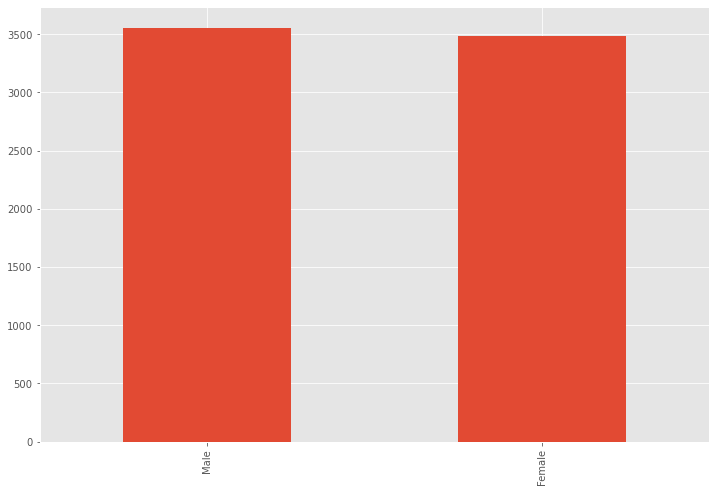

In [42]:
df['Gender'].value_counts().plot.bar()

<AxesSubplot:>

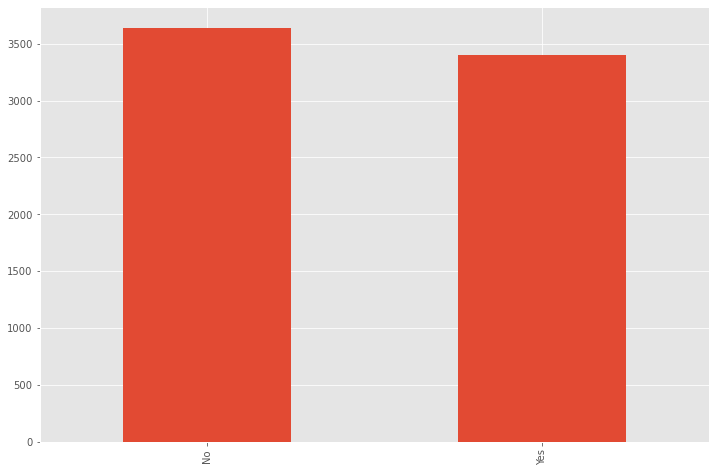

In [43]:
df['Partner'].value_counts().plot.bar()

<AxesSubplot:>

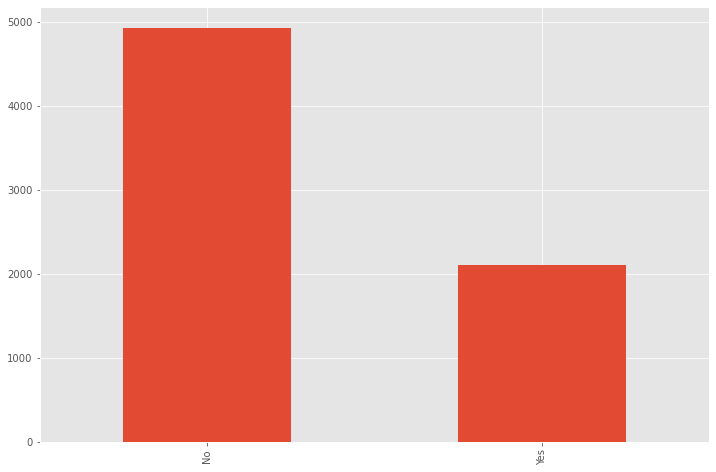

In [44]:
df['Dependents'].value_counts().plot.bar()

<AxesSubplot:>

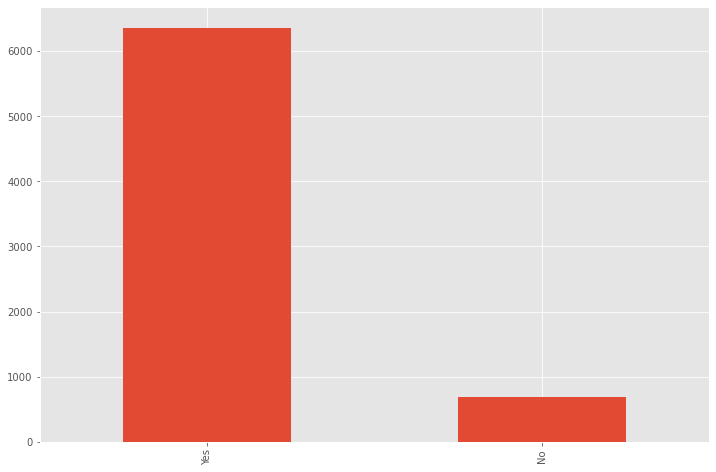

In [45]:
df['PhoneService'].value_counts().plot.bar()

<AxesSubplot:>

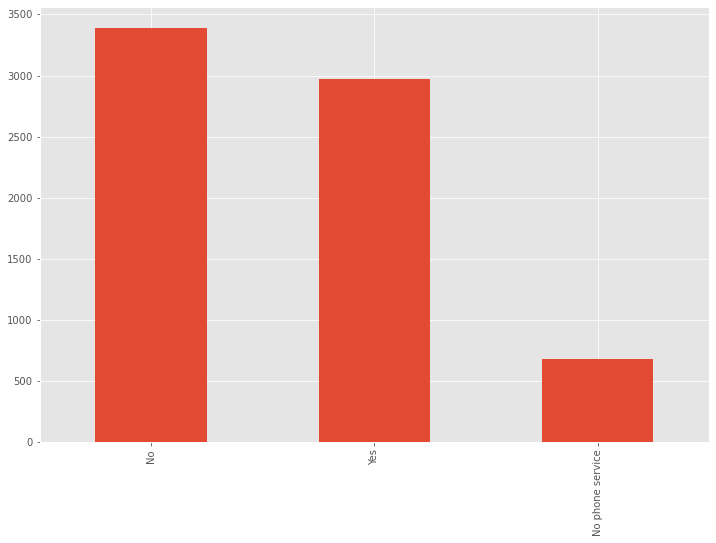

In [46]:
df['MultipleLines'].value_counts().plot.bar()

<AxesSubplot:>

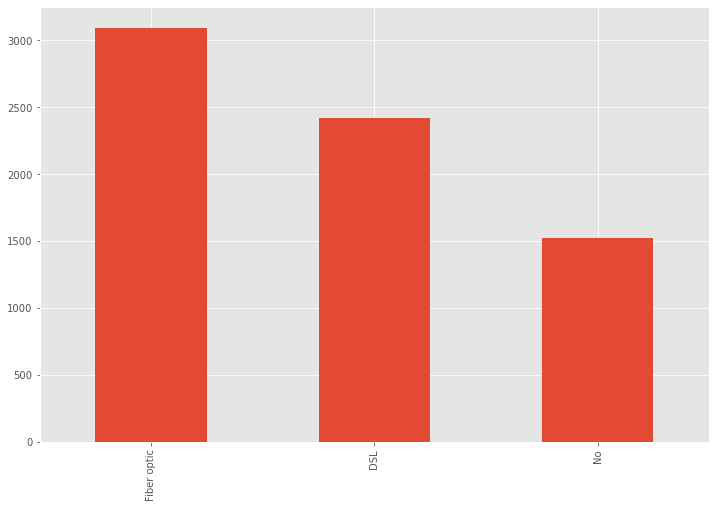

In [47]:
df['InternetService'].value_counts().plot.bar()

<AxesSubplot:>

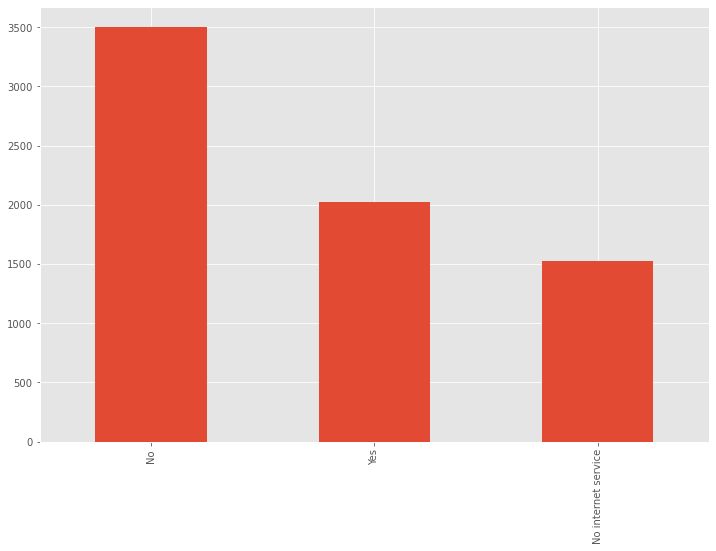

In [48]:
df['OnlineSecurity'].value_counts().plot.bar()

<AxesSubplot:>

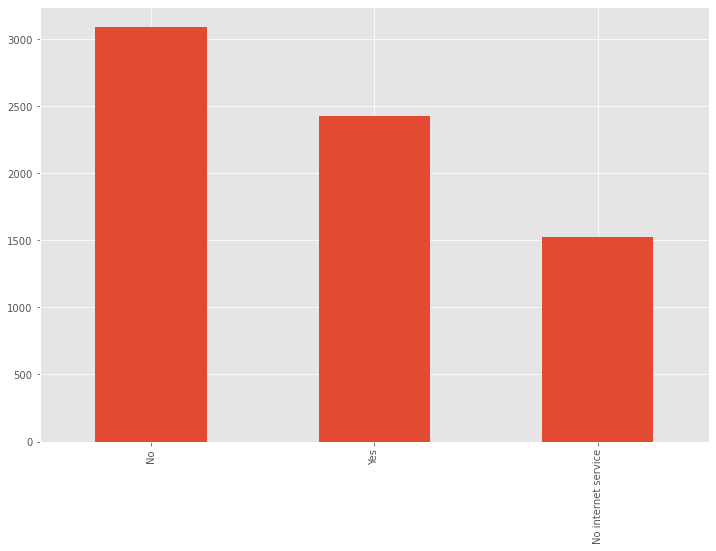

In [49]:
df['OnlineBackup'].value_counts().plot.bar()

<AxesSubplot:>

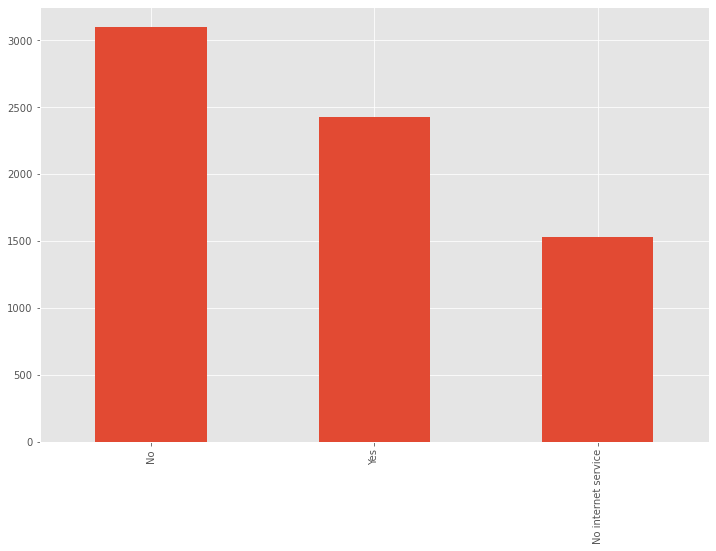

In [50]:
df['DeviceProtection'].value_counts().plot.bar()

<AxesSubplot:>

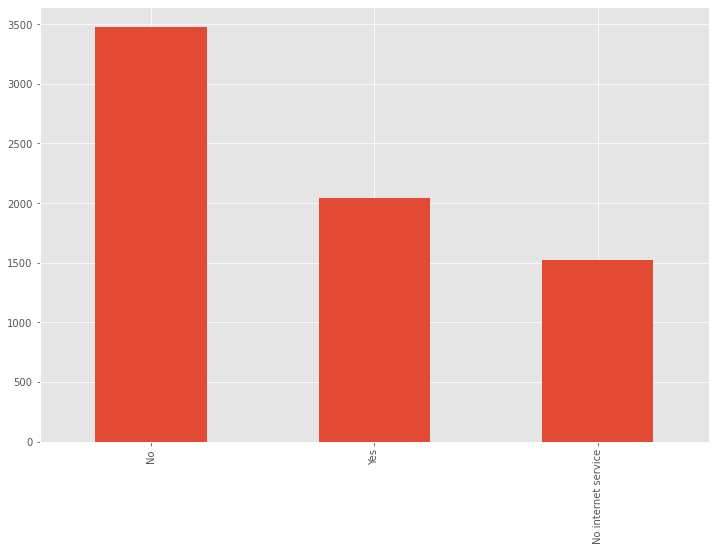

In [51]:
df['TechSupport'].value_counts().plot.bar()

<AxesSubplot:>

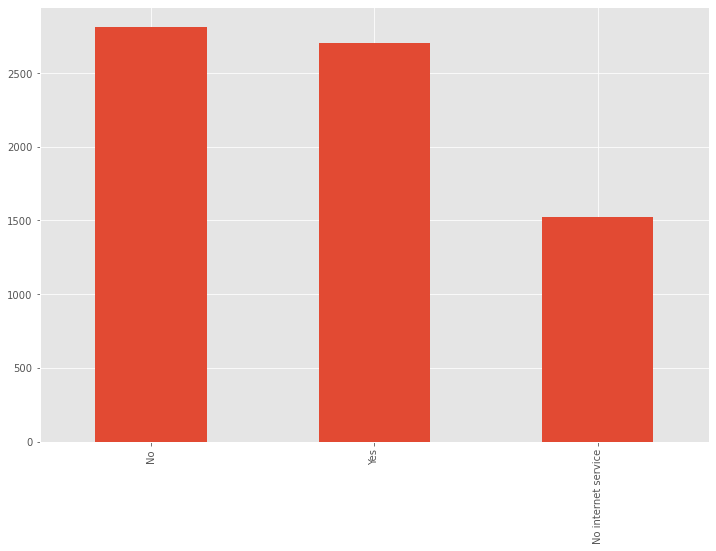

In [52]:
df['StreamingTV'].value_counts().plot.bar()

<AxesSubplot:>

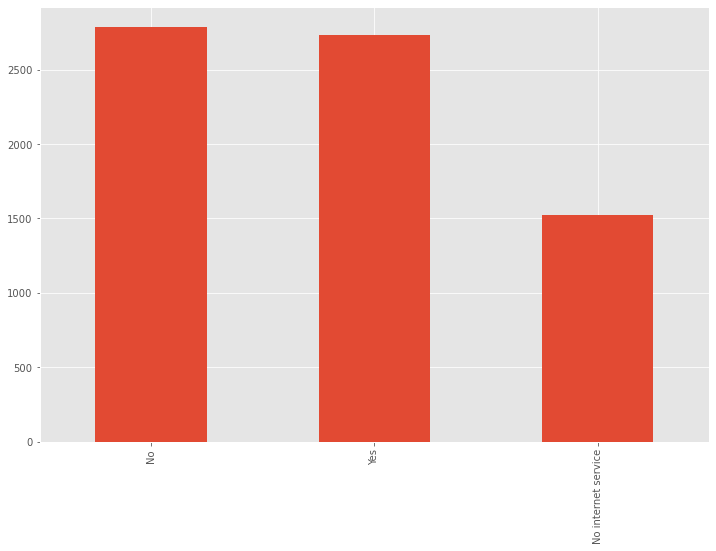

In [53]:
df['StreamingMovies'].value_counts().plot.bar()

<AxesSubplot:>

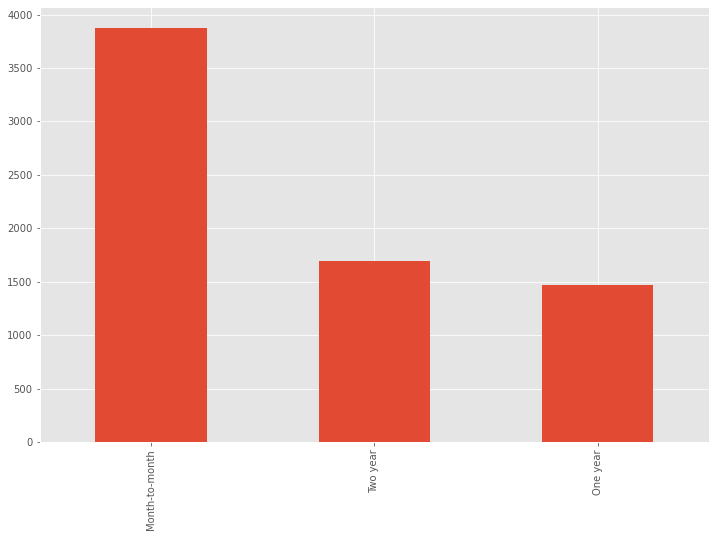

In [54]:
df['Contract'].value_counts().plot.bar()

<AxesSubplot:>

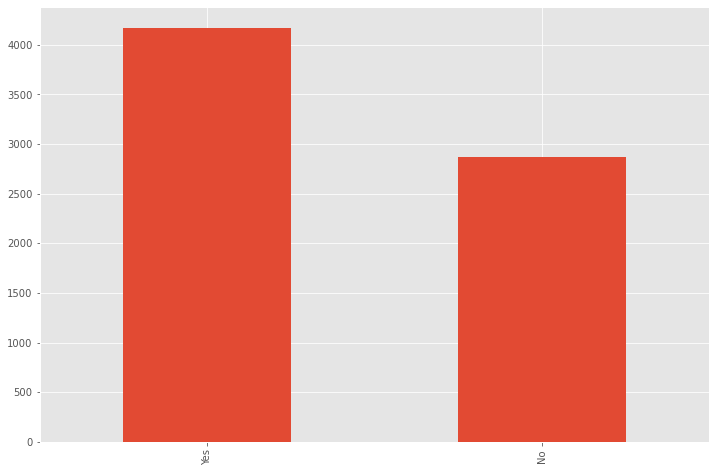

In [55]:
df['PaperlessBilling'].value_counts().plot.bar()

<AxesSubplot:>

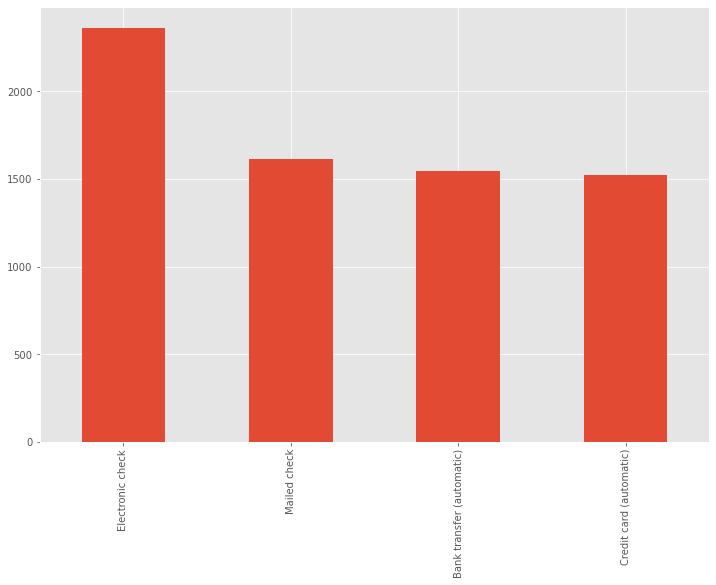

In [56]:
df['PaymentMethod'].value_counts().plot.bar()

<AxesSubplot:>

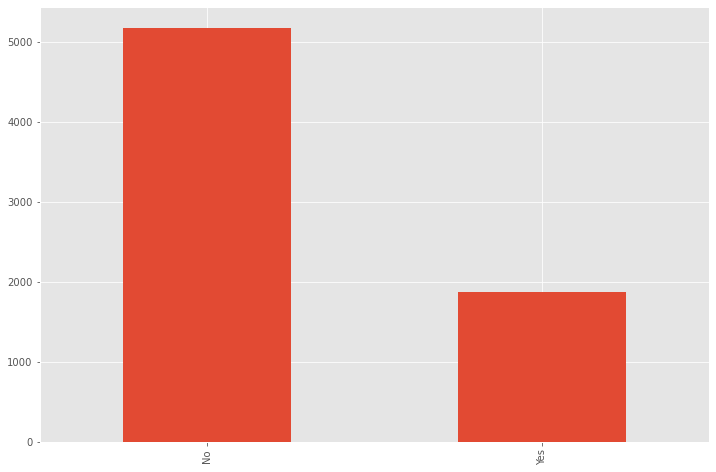

In [57]:
df['Churn'].value_counts().plot.bar()

<AxesSubplot:>

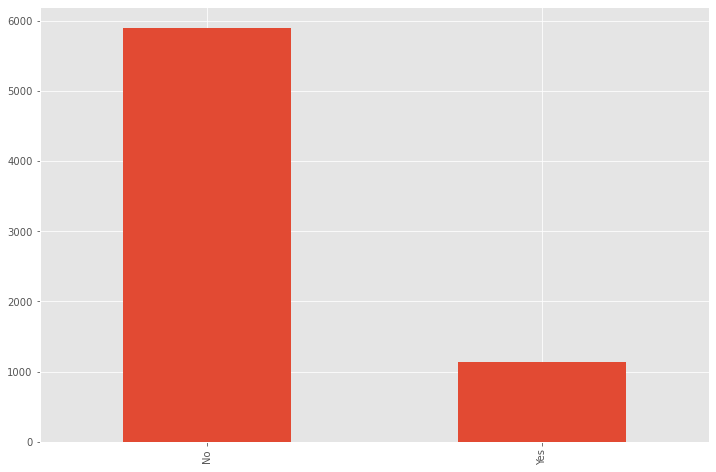

In [58]:
df['SeniorCitizen'].value_counts().plot.bar()